In [1]:
import glob
import sys

import numpy as np
import pandas as pd
import tensorflow as tf

sys.path.append("../../")

from helpers.experiment import experiment
from helpers.assess import resolve_sample_weight

/usr/local/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')




Preparing model for Experiment: function_dataset_01_mean



Commencing Experiment: function_dataset_01_mean

ytrain [6 0 7 ... 0 4 3]
classes ['genre_blues' 'genre_classical' 'genre_country' 'genre_disco'
 'genre_hiphop' 'genre_jazz' 'genre_metal' 'genre_pop' 'genre_reggae'
 'genre_rock']
inverse [0 1 2 3 4 5 6 7 8 9]
EXECUTING
[6 0 7 ... 0 4 3]
{0: 4.566844919786096, 1: 0.4046434494195688, 2: 5.223241590214068, 3: 5.9100346020761245, 4: 1.0041152263374487, 5: 1.3763094278807413, 6: 2.568421052631579, 7: 0.39962564342536266, 8: 2.16751269035533, 9: 0.53375}
Epoch 1/10
1708/1708 [==============================] - 2s 675us/step - loss: 2.0561 - accuracy: 0.2679
Epoch 2/10
1708/1708 [==============================] - 1s 701us/step - loss: 1.8653 - accuracy: 0.3176
Epoch 3/10
1708/1708 [==============================] - 1s 681us/step - loss: 1.8092 - accuracy: 0.3412
Epoch 4/10
1708/1708 [==============================] - 1s 644us/step - loss: 1.7898 - accuracy: 0.3475
Epoch 5/10
1708/17

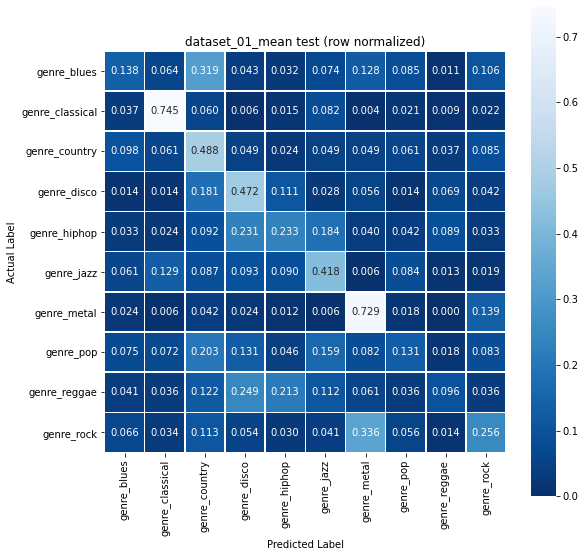

In [2]:
dataset_folder = "../../datasets/"
# datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
datasets = [f'{dataset_folder}dataset_01_mean.pickle']

learning_rate = 0.01
batch_size = 10
epochs = 10
hidden_layers = 3 # should be 0 for baseline model
hidden_size = 10

def nn_model_factory(X_train,y_train,le):
    model = tf.keras.Sequential()
    for _ in range(hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=hidden_size,
            activation='tanh'
        ))
    model.add(tf.keras.layers.Dense(
        units=len(le.classes_),
        activation='softmax'
    ))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',     
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    return model

def nn_fit_call_fn(model,X_train,y_train,class_weight):
    model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        class_weight=class_weight,
        verbose=1
   )
    
for dataset in datasets:

    experiment(
        nn_model_factory,
        dataset,
        model_fit_call_fn=nn_fit_call_fn,
        postprocess_y_pred_fn=lambda y: np.argmax(y, axis=-1)
    )
    

In [3]:
# isfunction(aa)